# MANOJ KUMAR - 2048015

# STEP 1 : Importing requisite libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno 
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.simplefilter('ignore')

from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier

# STEP 2 : Importing training dataset

In [2]:
# Reading the dataset
ckd_df = pd.read_csv('kidney_disease.csv')

In [3]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
##Rename the columns to have meaningful names
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

# STEP 3 : Exploratory Data Analysis


In [5]:
# Check the data first
ckd_df.head(5)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

Inference - most of the features are float. The object features need verified categorical values

In [7]:
#Check the number of NULL values in the train Dataset
print('Null values in Train Data: \n', ckd_df.isnull().sum())

Null values in Train Data: 
 id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


Inference - There are missing values for rbc, wbc. Given the small size of train dataset, there is imputation required.

In [8]:
#Check the target value counts
print('Total Count of the Prediction Output Column Classification values: \n', ckd_df['classification'].value_counts())

Total Count of the Prediction Output Column Classification values: 
 ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64


Inference - Distribution is balanced and good. Target values need no correction.

In [9]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

In [10]:
ckd_df["white_blood_cell_count"]=ckd_df["white_blood_cell_count"].replace("\t?", np.nan)
ckd_df["red_blood_cell_count"]=ckd_df["red_blood_cell_count"].replace("\t?", np.nan)
ckd_df['diabetes_mellitus'] = ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["packed_cell_volume"]= ckd_df["packed_cell_volume"].replace("\t?", np.nan)

In [11]:
# Looking at the statistial distribution of the data including categorical variables
ckd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,400,NaN,NaN,NaN,199.5,115.614,0,99.75,199.5,299.25,399
age,391,NaN,NaN,NaN,51.4834,17.1697,2,42,55,64.5,90
blood_pressure,388,NaN,NaN,NaN,76.4691,13.6836,50,70,80,80,180
specific_gravity,353,NaN,NaN,NaN,1.01741,0.00571662,1.005,1.01,1.02,1.02,1.025
albumin,354,NaN,NaN,NaN,1.01695,1.35268,0,0,0,2,5
sugar,351,NaN,NaN,NaN,0.450142,1.09919,0,0,0,0,5
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# STEP 4 : Distribution of all features


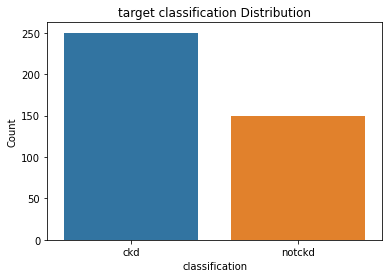

In [12]:
sns.countplot(x='classification',data=ckd_df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target classification Distribution")
plt.show()

In [13]:
##Percent of target data
print("Percent of distribution below:")
ckd_df["classification"].value_counts()/len(ckd_df)*100

Percent of distribution below:


ckd       62.5
notckd    37.5
Name: classification, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf31acadf0>,
      dtype=object)

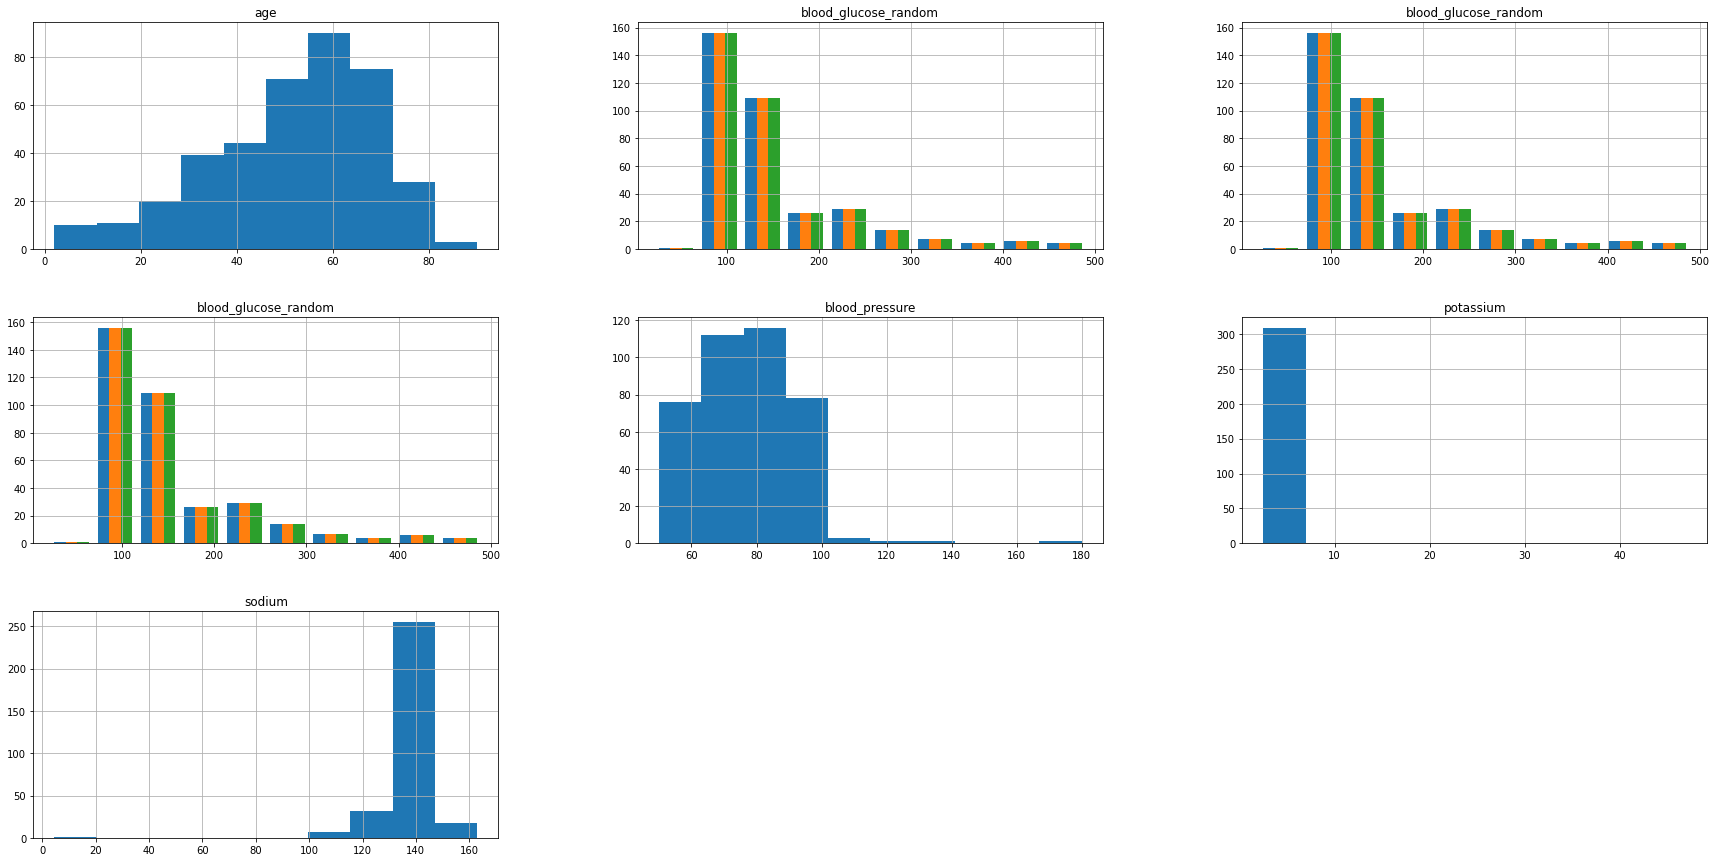

In [14]:
#histograms for all continous variables
ckd_df.hist(['age','blood_pressure', 'blood_glucose_random', 'blood_glucose_random', 
         'blood_glucose_random', 'sodium', 'potassium',  
         'packed_cell_volume', 'packed_cell_volume', 'red_blood_cell_count'], figsize=(30,15))

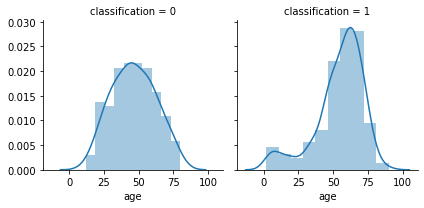

In [16]:
# Check distribution of age for each target class
g = sns.FacetGrid(ckd_df,col="classification")
g.map(sns.distplot,"age", bins=10)
plt.show()

# STEP 5 : Check correlation between features

In [17]:
corr_df = ckd_df.corr()

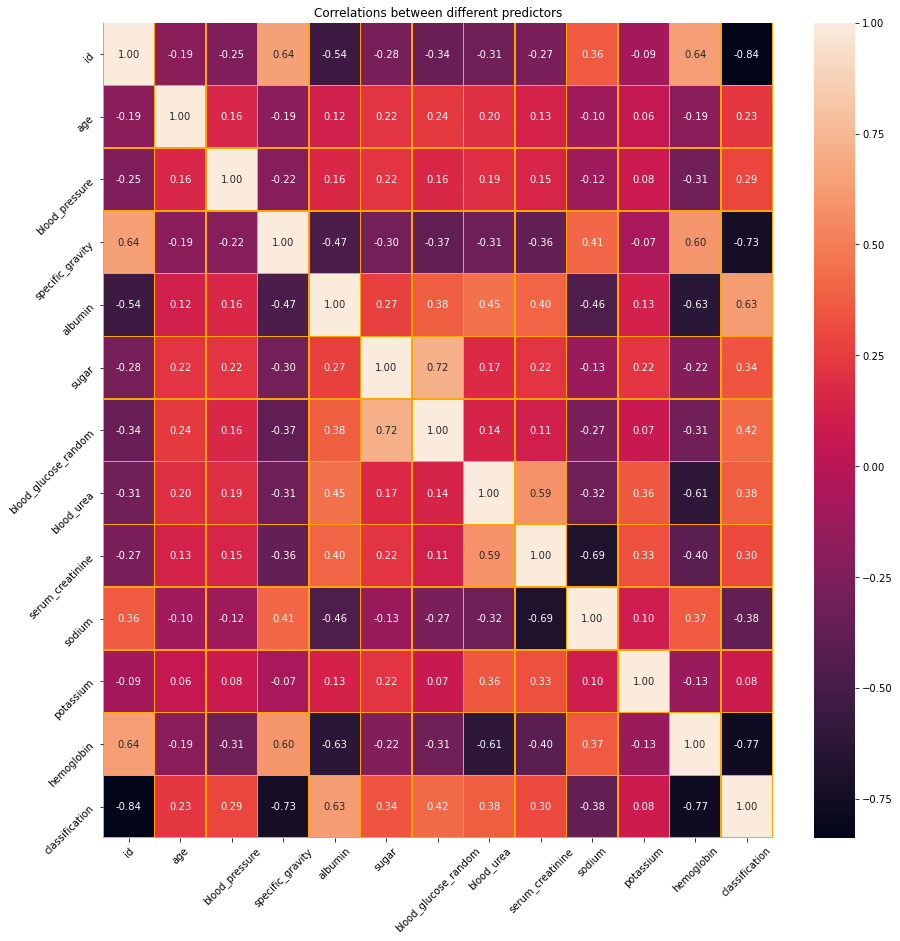

In [18]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

# STEP 6 : Data preprocessing

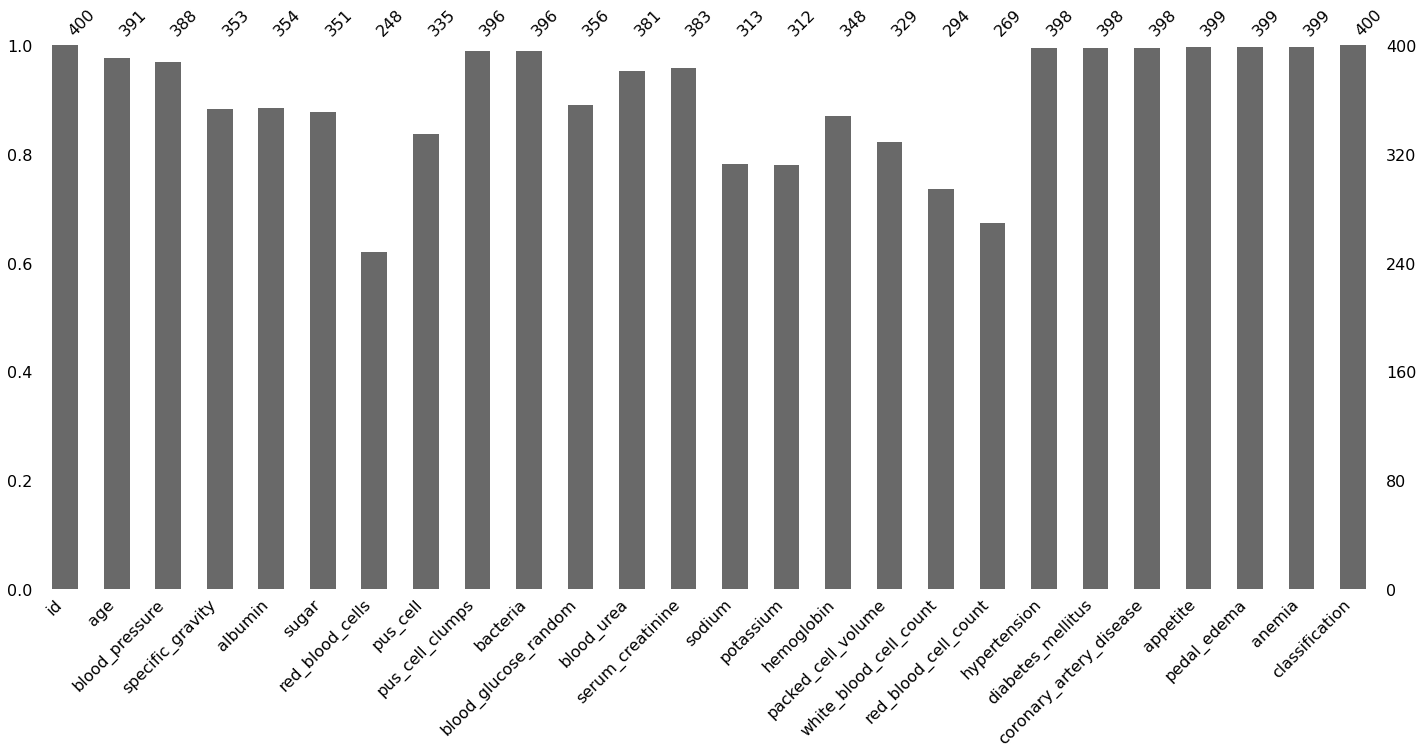

In [19]:
## Visualize the missing values in a histogram
msno.bar(ckd_df)

In [20]:
for string_column in ["red_blood_cells","pus_cell","pus_cell_clumps","bacteria","hypertension",
                      "diabetes_mellitus","coronary_artery_disease",
                      "pedal_edema","anemia","appetite"]:
    ckd_df[string_column]=ckd_df[string_column].astype(str)

In [21]:
## Do some encoding to use KNN Imputer
ckd_df['red_blood_cells']=ckd_df['red_blood_cells'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell']=ckd_df['pus_cell'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell_clumps']=ckd_df['pus_cell_clumps'].replace({'notpresent':0,'present':1})
ckd_df['bacteria']=ckd_df['bacteria'].replace({'notpresent':0,'present':1})
ckd_df['hypertension']=ckd_df['hypertension'].replace({'no':0,'yes':1})
ckd_df['diabetes_mellitus']=ckd_df['diabetes_mellitus'].replace({'no':0,'yes':1})
ckd_df['coronary_artery_disease']=ckd_df['coronary_artery_disease'].replace({'no':0,'yes':1})
ckd_df['pedal_edema']=ckd_df['pedal_edema'].replace({'no':0,'yes':1})
ckd_df['anemia']=ckd_df['anemia'].replace({'no':0,'yes':1})
ckd_df['appetite']=ckd_df['appetite'].replace({'poor':0,'good':1})

In [22]:
##List all columns with % NaNs
print (round((ckd_df.isnull().sum() * 100/ len(ckd_df)),2).sort_values(ascending=False))

red_blood_cell_count       32.75
white_blood_cell_count     26.50
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.75
hemoglobin                 13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
blood_pressure              3.00
age                         2.25
pus_cell_clumps             0.00
red_blood_cells             0.00
pus_cell                    0.00
classification              0.00
bacteria                    0.00
anemia                      0.00
hypertension                0.00
diabetes_mellitus           0.00
coronary_artery_disease     0.00
appetite                    0.00
pedal_edema                 0.00
id                          0.00
dtype: float64


In [23]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [24]:
impute_columns=list(set(ckd_df.columns)-set(["classification"]))
print(impute_columns)

['white_blood_cell_count', 'albumin', 'red_blood_cell_count', 'bacteria', 'blood_urea', 'blood_pressure', 'diabetes_mellitus', 'packed_cell_volume', 'anemia', 'appetite', 'serum_creatinine', 'blood_glucose_random', 'age', 'hypertension', 'sodium', 'potassium', 'pus_cell', 'hemoglobin', 'specific_gravity', 'pus_cell_clumps', 'red_blood_cells', 'pedal_edema', 'coronary_artery_disease', 'sugar', 'id']


In [25]:
imputer.fit(ckd_df[impute_columns])

KNNImputer()

In [26]:
X_trans=pd.DataFrame(imputer.transform(ckd_df[impute_columns]), columns=impute_columns)

In [27]:
X_trans.head(3)

,white_blood_cell_count,albumin,red_blood_cell_count,bacteria,blood_urea,blood_pressure,diabetes_mellitus,packed_cell_volume,anemia,appetite,...,potassium,pus_cell,hemoglobin,specific_gravity,pus_cell_clumps,red_blood_cells,pedal_edema,coronary_artery_disease,sugar,id
0,7800.0,1.0,5.20,0.0,36.0,80.0,1.0,44.0,0.0,1.0,...,3.96,1.0,15.4,1.02,0.0,0.2,0.0,0.0,0.0,0.0
1,6000.0,4.0,3.58,0.0,18.0,50.0,0.0,38.0,0.0,1.0,...,4.00,1.0,11.3,1.02,0.0,0.4,0.0,0.0,0.0,1.0
2,7500.0,2.0,3.56,0.0,53.0,80.0,1.0,31.0,1.0,0.0,...,4.50,1.0,9.6,1.01,0.0,1.0,0.0,0.0,3.0,2.0


In [28]:
X=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [29]:
y=ckd_df["classification"]

In [30]:
X_prod=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   white_blood_cell_count   400 non-null    float64
 1   albumin                  400 non-null    float64
 2   red_blood_cell_count     400 non-null    float64
 3   bacteria                 400 non-null    float64
 4   blood_urea               400 non-null    float64
 5   blood_pressure           400 non-null    float64
 6   diabetes_mellitus        400 non-null    float64
 7   packed_cell_volume       400 non-null    float64
 8   anemia                   400 non-null    float64
 9   appetite                 400 non-null    float64
 10  serum_creatinine         400 non-null    float64
 11  blood_glucose_random     400 non-null    float64
 12  age                      400 non-null    float64
 13  hypertension             400 non-null    float64
 14  sodium                   4

# STEP 6 : Predictive Models with hyperparameter tuning Section

In [32]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred_lr)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [33]:
import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


In [36]:
# Logistic Regression Hyper parameter tuning
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

lr = LogisticRegression() 
lr = GridSearchCV(lr, param_grid, cv = 5) 
lr.fit(X_train, y_train) 

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {}".format(lr.best_estimator_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.946875


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.94      0.93      0.94        55

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Accuracy of Logistic Regression is : 0.9125


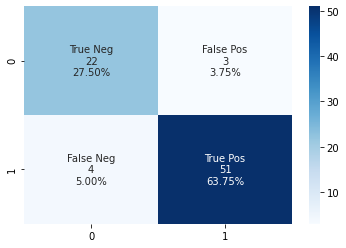

In [37]:
y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression is :", accuracy_lr)

In [39]:
# Support Vector Machine
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
svm.fit(X_train, y_train)

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.87      0.84      0.85        55

    accuracy                           0.80        80
   macro avg       0.77      0.78      0.77        80
weighted avg       0.81      0.80      0.80        80

Accuracy of Logistic Regression is : 0.8


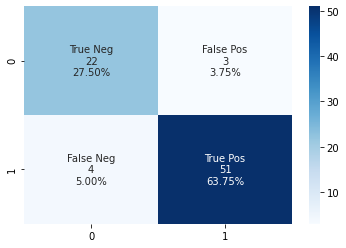

In [40]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Logistic Regression is :", accuracy_svm)

In [41]:
print("Accuracy of Logistic Regression is :", accuracy_lr)
print("Accuracy of Logistic Regression is :", accuracy_svm)

Accuracy of Logistic Regression is : 0.9125
Accuracy of Logistic Regression is : 0.8
